# Hola Ricardo! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Ricardo. Tu notebook tiene todo el desarrollo necesario, pero hay algunas modificaciones y correcciones que debes hacer. En específico, debes corregir el gráfico de conversión y los tests utilizados para comparar el revenue entre los grupos. Te dejé indicaciones, revísalas y realiza las modificaciones necesarias.
    
Saludos!    

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho Ricardo, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.

Saludos!

</div>

----

# Importar librerias

In [24]:
# Importo las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from datetime import datetime
from scipy.stats import mannwhitneyu



# Cargar datasets y procesarlos

In [2]:
# Cargo los datasets
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

# Vista previa
print(hypotheses.info())
print(orders.info())
print(visits.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data col

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto. Bien hecho al importar la data usando el parámetro `sep=;"` para que la lectura de los datos se pueda realizar correctamente.
    
Si la data se hubiese leido sin ese parámetro, todas las columnas quedarían en una sola. En este caso, para esta data, la única columna hubiese sido `'Hypothesis;Reach;Impact;Confidence;Effort'`. Si el dataframe ya estuviese así importado, se puede corregir haciendo 
    
    `df = df['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(';', expand=True)`

</div>

In [3]:
# Convierto las columnas de fecha
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

In [4]:
# Revisión rápida
print(hypotheses)

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


In [5]:
print(orders.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B


In [6]:
print(visits.head())

        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien con esta revisión rápida, pero te recomiendo usar `display()` para mostrar un dataframe, da mejor formato de output que `print()`. Por ejemplo, en vez de usar `print(df.head())`, usa `display(df.head())`.

</div>

# Priorizar hipótesis

In [7]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
ice_sorted = hypotheses.sort_values(by='ICE', ascending=False)

print(ice_sorted)

                                          Hypothesis  Reach  Impact  \
8  Launch a promotion that gives users discounts ...      1       9   
0  Add two new channels for attracting traffic. T...      3      10   
7  Add a subscription form to all the main pages....     10       7   
6  Show banners with current offers and sales on ...      5       3   
2  Add product recommendation blocks to the store...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort        ICE  
8           9       5  16.200000  
0           8       6  13.333333  
7           8       5  11.200000  
6           8       3   8.000000  
2           7       3   7.000000  
1           4      10   2.000000  
5           2       3   1.333333  
3        

In [8]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
rice_sorted = hypotheses.sort_values(by='RICE', ascending=False)

print(rice_sorted)

                                          Hypothesis  Reach  Impact  \
7  Add a subscription form to all the main pages....     10       7   
2  Add product recommendation blocks to the store...      8       3   
0  Add two new channels for attracting traffic. T...      3      10   
6  Show banners with current offers and sales on ...      5       3   
8  Launch a promotion that gives users discounts ...      1       9   
3  Change the category structure. This will incre...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort        ICE   RICE  
7           8       5  11.200000  112.0  
2           7       3   7.000000   56.0  
0           8       6  13.333333   40.0  
6           8       3   8.000000   40.0  
8           9       5  16.200000   16.2  
3           3       8   1.125000    9

In [9]:
# Agrego rankings para comparar
hypotheses['ICE_rank'] = hypotheses['ICE'].rank(method='min', ascending=False)
hypotheses['RICE_rank'] = hypotheses['RICE'].rank(method='min', ascending=False)

# Ver diferencias de ranking
ranking_diff = hypotheses[['Hypothesis', 'ICE_rank', 'RICE_rank']].sort_values(by='RICE_rank')

print(ranking_diff)

                                          Hypothesis  ICE_rank  RICE_rank
7  Add a subscription form to all the main pages....       3.0        1.0
2  Add product recommendation blocks to the store...       5.0        2.0
0  Add two new channels for attracting traffic. T...       2.0        3.0
6  Show banners with current offers and sales on ...       4.0        3.0
8  Launch a promotion that gives users discounts ...       1.0        5.0
3  Change the category structure. This will incre...       8.0        6.0
1  Launch your own delivery service. This will sh...       6.0        7.0
5  Add a customer review page. This will increase...       7.0        7.0
4  Change the background color on the main page. ...       9.0        9.0


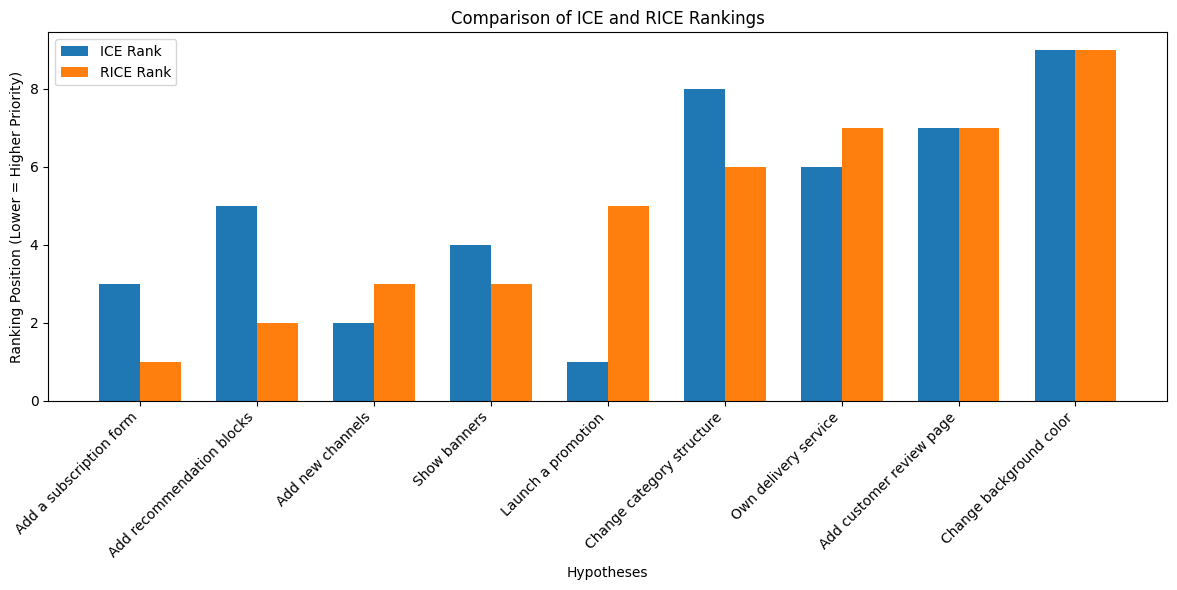

In [10]:
# Datos de hipótesis y rankings (resumen del usuario)
data = {
    "Hypothesis": [
        "Add a subscription form",
        "Add recommendation blocks",
        "Add new channels",
        "Show banners",
        "Launch a promotion",
        "Change category structure",
        "Own delivery service",
        "Add customer review page",
        "Change background color"
    ],
    "ICE_rank": [3, 5, 2, 4, 1, 8, 6, 7, 9],
    "RICE_rank": [1, 2, 3, 3, 5, 6, 7, 7, 9]
}

# Creo DataFrame de ranks
df_ranks = pd.DataFrame(data)


plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df_ranks))

# Barras de ICE y RICE
plt.bar(x, df_ranks['ICE_rank'], width=bar_width, label='ICE Rank', align='center')
plt.bar([i + bar_width for i in x], df_ranks['RICE_rank'], width=bar_width, label='RICE Rank', align='center')

plt.xlabel('Hypotheses')
plt.ylabel('Ranking Position (Lower = Higher Priority)')
plt.title('Comparison of ICE and RICE Rankings')
plt.xticks([i + bar_width / 2 for i in x], df_ranks['Hypothesis'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

Para priorizar las hipótesis sobre cómo aumentar los ingresos en la tienda online, se aplicaron los frameworks ICE y RICE. Mientras que ICE considera el impacto, la confianza y el esfuerzo, RICE añade una dimensión clave: el alcance o número de usuarios afectados. Al comparar ambos rankings, observamos que hipótesis como “Add a subscription form” y “Add recommendation blocks” ganan prioridad en RICE gracias a su alto alcance, mientras que “Launch a promotion” pierde prioridad al tener un alcance más limitado o un esfuerzo mayor. Esto demuestra que RICE ofrece una evaluación más completa en contextos de alto tráfico, permitiendo tomar decisiones más alineadas con el impacto global en los ingresos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho con el cálculo de ambas métricas y su comparación. El gráfico agregado permite compararlas rápidamente

</div>

#  Análisis del test A/B

## Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

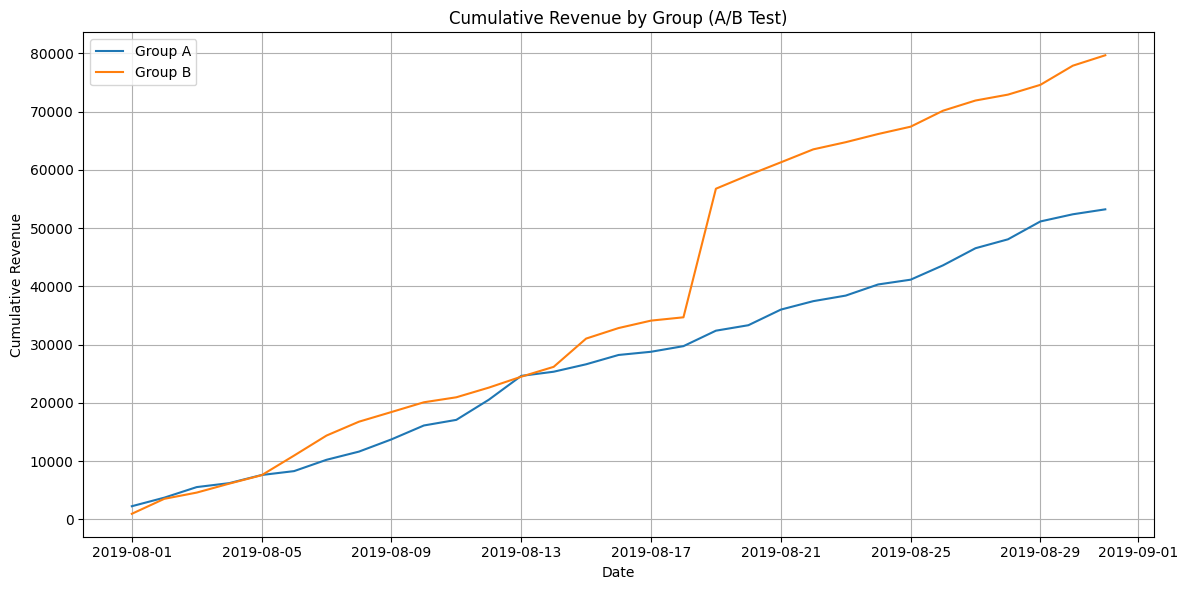

In [11]:
# Elimino usuarios que están duplicados
groupA_users = set(orders[orders['group'] == 'A']['visitorId'])
groupB_users = set(orders[orders['group'] == 'B']['visitorId'])
duplicated_users = groupA_users & groupB_users
orders = orders[~orders['visitorId'].isin(duplicated_users)]

# Calculo ingresos acumulados por grupo y fecha
cumulative_revenue = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
cumulative_revenue = cumulative_revenue.pivot(index='date', columns='group', values='revenue').fillna(0)
cumulative_revenue = cumulative_revenue.cumsum()

# Grafico ingresos acumulados
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue.index, cumulative_revenue['A'], label='Group A')
plt.plot(cumulative_revenue.index, cumulative_revenue['B'], label='Group B')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue by Group (A/B Test)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho al remover usuarios duplicados entre grupos, para un análisis A/B es muy importante

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Es un día el que diferencia B del grupo A, pasado ese día, la curva sigue siendo paralela. 

</div>

## Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

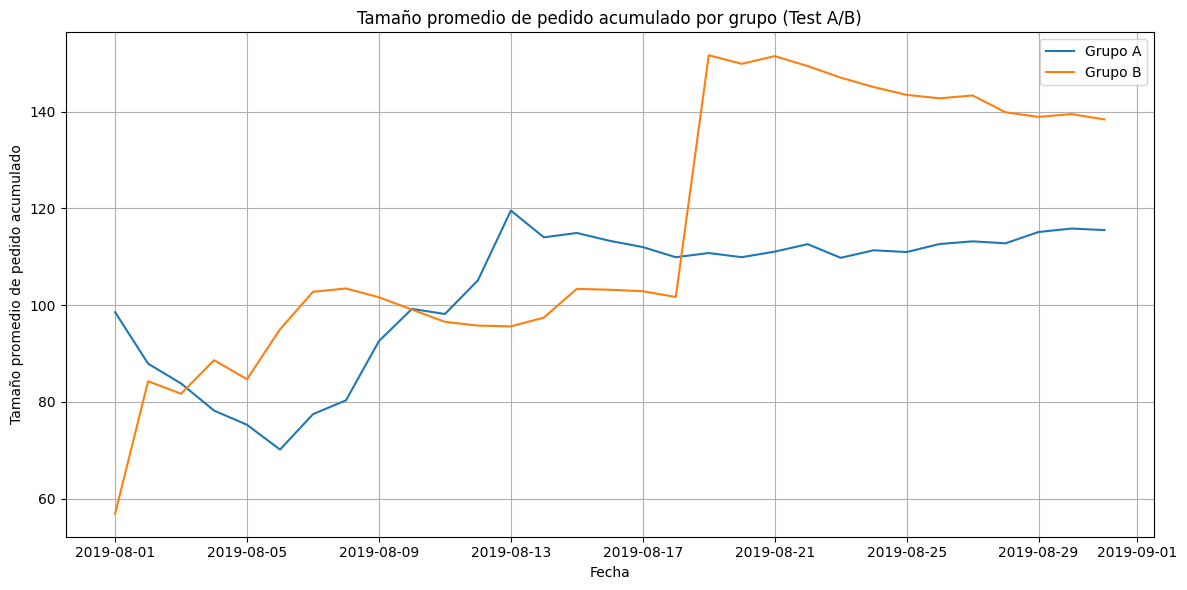

In [12]:
# Agrupo por fecha y grupo para calcular suma de ingresos y número de pedidos diarios
daily_metrics = orders.groupby(['date', 'group']).agg({
    'revenue': 'sum',
    'transactionId': 'nunique'
}).reset_index()

# Calculo tamaño promedio de pedido por día y grupo
daily_metrics['avg_order_size'] = daily_metrics['revenue'] / daily_metrics['transactionId']

# Reorganizo en columnas por grupo
avg_order_size = daily_metrics.pivot(index='date', columns='group', values='avg_order_size').fillna(0)

# Acumulado: promedio acumulado hasta cada día
avg_order_size_cum = avg_order_size.expanding().mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_order_size_cum.index, avg_order_size_cum['A'], label='Grupo A')
plt.plot(avg_order_size_cum.index, avg_order_size_cum['B'], label='Grupo B')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio de pedido acumulado')
plt.title('Tamaño promedio de pedido acumulado por grupo (Test A/B)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, correcto. El mismo día que vimos en el otro gráfico, tuvo un promedio de pedidos muy grandes, por lo que se va confirmando nuestra sospecha. Luego de ese día, tiende a bajar, puesto que ya no hay pedidos tan grandes y debería volver a un nivel similar al anterior.

</div>

Conclusiones del gráfico
Ambos grupos comienzan con variabilidad, lo cual es común al inicio del test A/B debido al bajo volumen de datos en los primeros días.

A mediados de agosto, ambos grupos estabilizan sus métricas, aunque con una diferencia creciente:

El grupo B muestra un aumento brusco alrededor del 18 de agosto, alcanzando un tamaño promedio de pedido acumulado significativamente mayor al de A.

El grupo A sigue una tendencia más estable, con valores entre 100 y 115 USD.

En la última parte del experimento, el grupo B mantiene consistentemente un tamaño promedio mayor, alrededor de los 140 USD, frente al grupo A que se mantiene cercano a los 115 USD.

Conjeturas posibles
El incremento repentino en el grupo B podría estar relacionado con:

Una anomalía (por ejemplo, uno o más pedidos muy altos).

Un efecto real del experimento (la variante B incentiva pedidos de mayor valor).

Si no se trata de una anomalía, podríamos suponer que la variante B mejora la calidad de los pedidos (por ejemplo, promociones, recomendaciones, diseño, etc.).



## Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

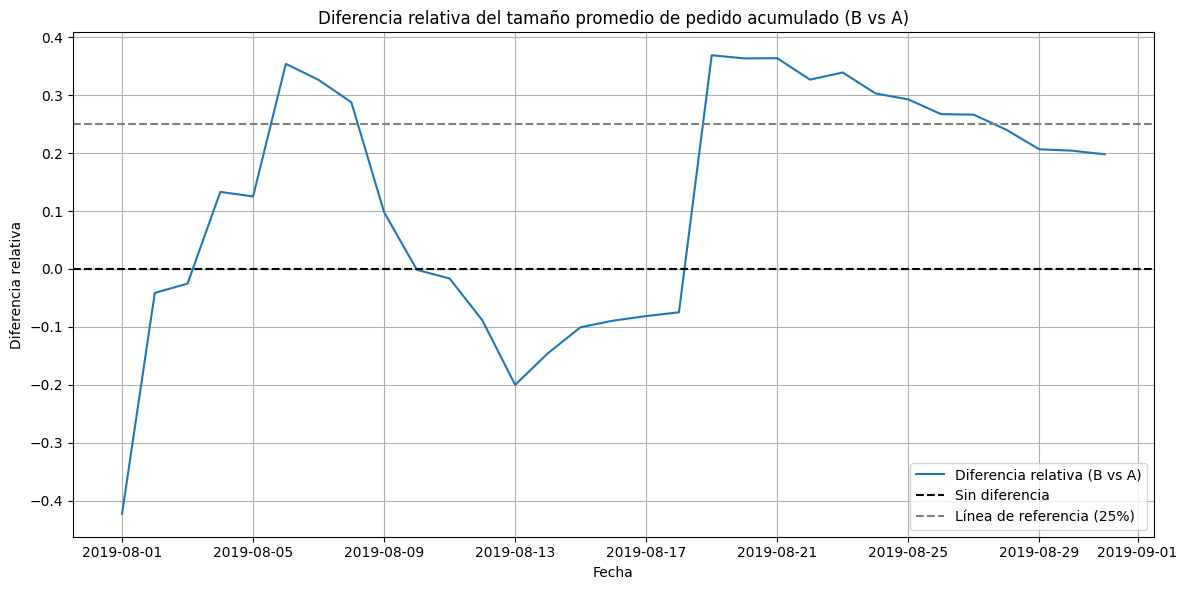

In [13]:
# Calculo la diferencia relativa acumulada de B respecto a A
relative_difference = (avg_order_size_cum['B'] - avg_order_size_cum['A']) / avg_order_size_cum['A']

plt.figure(figsize=(12, 6))
plt.plot(relative_difference.index, relative_difference, label='Diferencia relativa (B vs A)')
plt.axhline(y=0, color='black', linestyle='--', label='Sin diferencia')
plt.axhline(y=0.25, color='grey', linestyle='--', label='Línea de referencia (25%)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.title('Diferencia relativa del tamaño promedio de pedido acumulado (B vs A)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto el gráfico, nos muestra que después de la primera semana los tamaños se iban regualizando hasta el 18/08. En esa fecha, B aumenta, pero posterior a esa fecha, los tamaños de pedidos promedio acumulado tienden a igualarse.

</div>

Conclusiones del gráfico
Inicio muy volátil: En los primeros días del test, la diferencia relativa fluctúa de forma extrema (hasta -40%), lo cual es esperado por el bajo volumen de datos inicial.

Zona de ventaja para B: A partir del 18 de agosto, el grupo B mantiene una ventaja estable de entre 20% y 35% en comparación con el grupo A.

Cruces y reversión: Antes de ese punto, la diferencia relativa cae incluso por debajo de 0 (entre el 10 y el 16 de agosto), indicando que el grupo B tenía un tamaño de pedido menor que A en ese momento.

Estabilización positiva: Después del salto (coincidiendo con el pico que viste antes), la diferencia se estabiliza por arriba de la línea de referencia del 25%, lo que indica que el grupo B termina con pedidos consistentemente más grandes.

Conjeturas posibles
El aumento repentino en grupo B sugiere un evento puntual (como una promoción, un error en los datos o un gran pedido) que alteró el promedio.

La ventaja sostenida de B hacia el final del experimento puede ser una señal real de mejora, posiblemente resultado del cambio introducido en la variante B.

El comportamiento antes del 18 de agosto sugiere que los efectos de la prueba tardaron en manifestarse o que los primeros datos no eran suficientemente representativos.


## Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

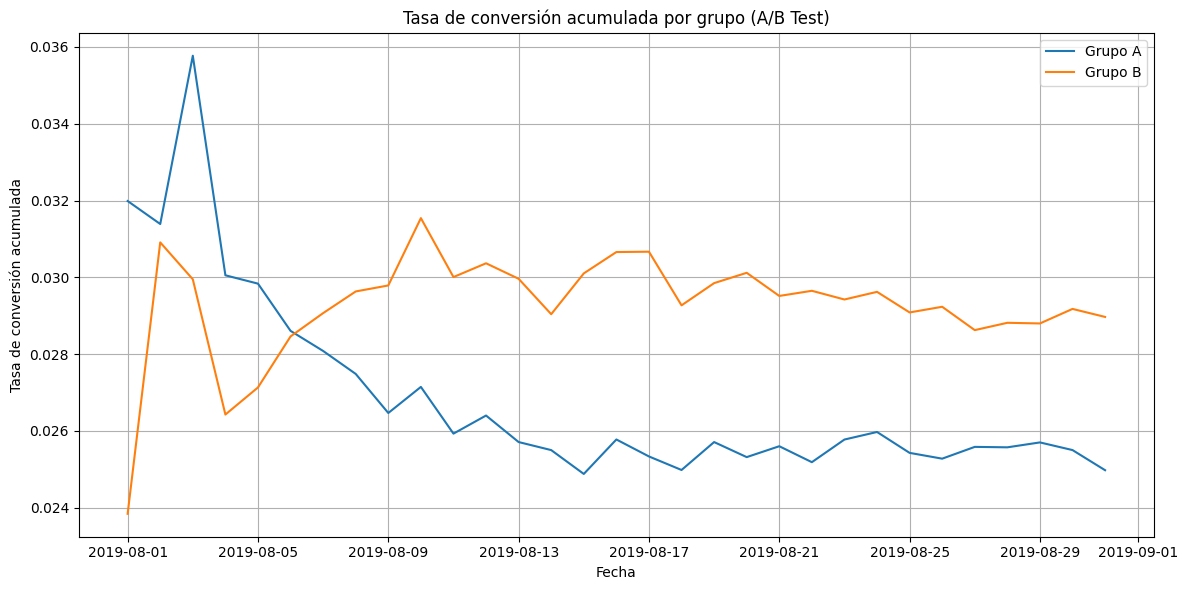

In [23]:
# Agrupo pedidos por fecha y grupo
daily_orders = orders.groupby(['date', 'group'])['transactionId'].nunique().reset_index()
daily_orders.rename(columns={'transactionId': 'orders'}, inplace=True)

# Creo tabla completa por fecha y grupo
daily_data = pd.merge(visits, daily_orders, on=['date', 'group'], how='left')
daily_data['orders'] = daily_data['orders'].fillna(0)

# Ordeno por fecha
daily_data = daily_data.sort_values(by=['group', 'date'])

# Calculo los acumulados
daily_data['cumulative_visits'] = daily_data.groupby('group')['visits'].cumsum()
daily_data['cumulative_orders'] = daily_data.groupby('group')['orders'].cumsum()

# Calculo tasa de conversión acumulada
daily_data['cumulative_conversion'] = daily_data['cumulative_orders'] / daily_data['cumulative_visits']

# Pivotear para graficar más fácil
conversion_curve = daily_data.pivot(index='date', columns='group', values='cumulative_conversion')

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(conversion_curve.index, conversion_curve['A'], label='Grupo A')
plt.plot(conversion_curve.index, conversion_curve['B'], label='Grupo B')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión acumulada')
plt.title('Tasa de conversión acumulada por grupo (A/B Test)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Para la tasa de conversión, realiza el cálculo con la data acumulada, así tendremos una tasa de conversión acumulada que debería acercarse a un equilibrio en el tiempo.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien! La conversión acumulada nos muestra que en total el grupo B tiene mejor desempeño en esta métrica. Por otro lado, nota como no hay ningún cambio abrupto para el 17/08, por lo tanto, cualquier anomalía que vimos en los gráficos anteriores, se debe a un solo pedido probablemente.

</div>

Conclusiones:
La tasa de conversión acumulada del grupo B es consistentemente superior a la del grupo A a partir del día 5–6 del experimento.

Al principio, el grupo A arranca con ventaja, pero rápidamente es superado por el grupo B y no vuelve a recuperarse.

Ambas curvas se estabilizan con el tiempo:

Esto indica que la prueba tuvo duración suficiente y los efectos observados no son ruido temporal, sino que reflejan un comportamiento real de los usuarios.

La ventaja de B es sostenida, no puntual:

A diferencia de los picos o fluctuaciones diarias, la conversión acumulada muestra que el grupo B mantiene una diferencia clara y persistente a lo largo del experimento.

Conjeturas
El cambio aplicado en el grupo B genera más confianza o incentivo para completar la compra, y este efecto se sostiene a medida que aumentan las visitas.

El comportamiento inicial del grupo A fue una fluctuación aleatoria, ya que no se mantuvo su ventaja.

El diseño, funcionalidad o incentivo de B atrae a usuarios con más intención de compra, o reduce el abandono del carrito.

## Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

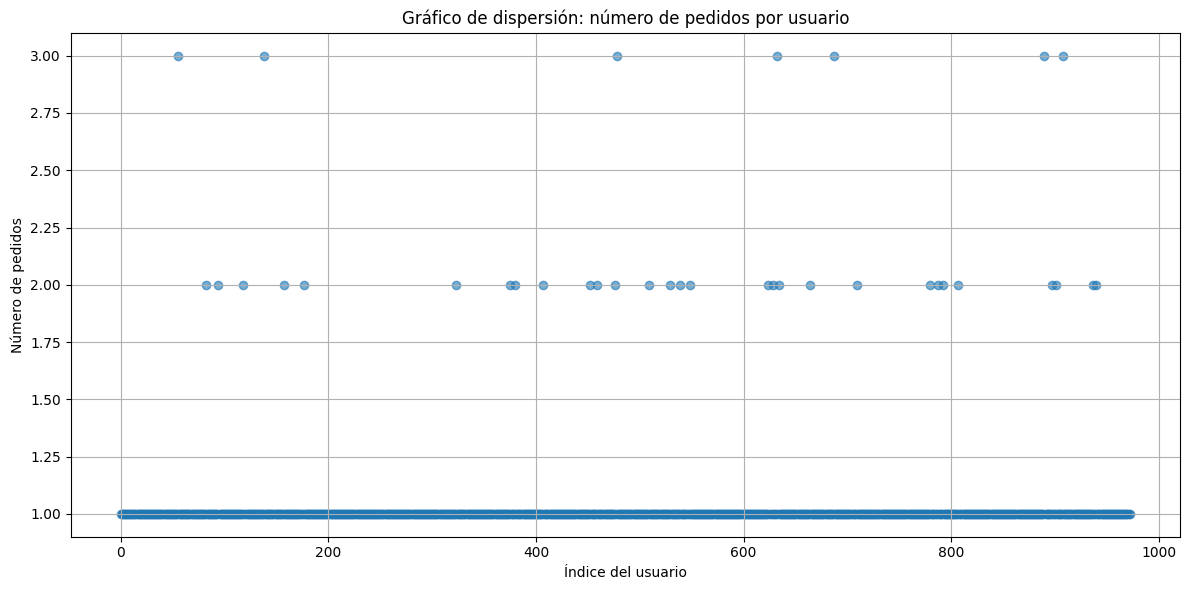

In [15]:
# Cuento cuántos pedidos hizo cada usuario
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_per_user.columns = ['visitorId', 'orders']

plt.figure(figsize=(12, 6))
plt.scatter(x=range(len(orders_per_user)), y=orders_per_user['orders'], alpha=0.6)
plt.xlabel('Índice del usuario')
plt.ylabel('Número de pedidos')
plt.title('Gráfico de dispersión: número de pedidos por usuario')
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien con el gráfico, aquí vemos que son solo unos cuantos pedidos los que califican como outlier, pero nada muy extremo
</div>

Conclusiones observadas:

La mayoría de los usuarios hizo exactamente un pedido

El gráfico muestra una gran densidad de puntos alineados en y = 1, lo que indica que la inmensa mayoría de los usuarios solo compró una vez durante el periodo del experimento.

Un pequeño grupo hizo 2 o 3 pedidos

Se observan algunos puntos en y = 2 y unos pocos en y = 3. Estos usuarios podrían ser clientes más leales o interesados en múltiples productos.

No hay valores extremos (outliers altos)

No se detectan usuarios con 4 o más pedidos, lo que indica comportamiento relativamente uniforme.

Conjeturas posibles:

El comportamiento de “una sola compra” puede deberse a que:

El periodo de observación del test A/B es demasiado corto para captar múltiples compras.

El producto o tienda en cuestión tiene un ciclo de compra largo (por ejemplo, productos no recurrentes).

No se han implementado estrategias efectivas de retención o recompra.

Los usuarios con 2 o 3 pedidos pueden ser casos interesantes para:

Estudio de fidelización.

Segmentación en campañas futuras.

## Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [16]:
percentil_95 = orders_per_user.quantile(0.95)
percentil_99 = orders_per_user.quantile(0.99)

print(f"Percentil 95: {percentil_95}")
print(f"Percentil 99: {percentil_99}")

anomaly_threshold = 3 
anomalous_users = orders_per_user[orders_per_user > anomaly_threshold]

print(f"Número de usuarios anómalos: {len(anomalous_users)}")

Percentil 95: visitorId    4.029952e+09
orders       1.000000e+00
Name: 0.95, dtype: float64
Percentil 99: visitorId    4.233005e+09
orders       2.000000e+00
Name: 0.99, dtype: float64
Número de usuarios anómalos: 973


## Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

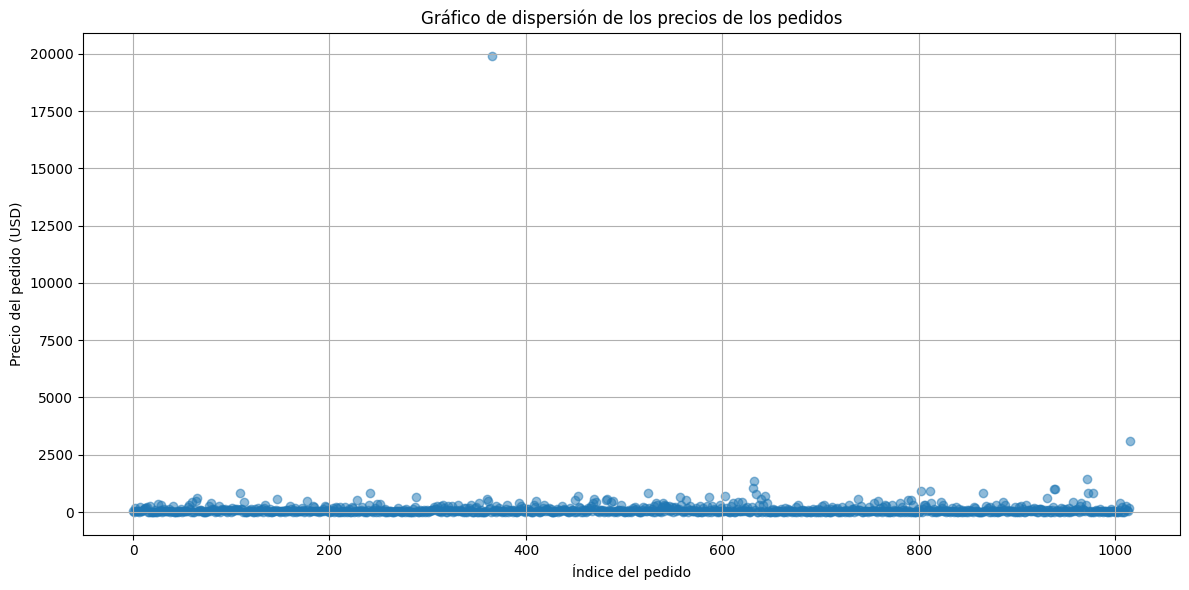

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(x=range(len(orders)), y=orders['revenue'], alpha=0.5)
plt.xlabel('Índice del pedido')
plt.ylabel('Precio del pedido (USD)')
plt.title('Gráfico de dispersión de los precios de los pedidos')
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, efectivamente hay algunos precios de pedidos muy altos, especialmente uno, que afectan la data. Probablemente ese es el pedido que diferencia tanto el revenue acumulado de los grupos.

</div>

Conclusiones del gráfico de dispersión
La mayoría de los pedidos tiene un precio bajo o moderado

Los puntos están muy concentrados por debajo de los 500 USD, lo que sugiere que ese es el rango típico de compra.

Existen varios pedidos con precios elevados (outliers)

Algunos pedidos superan los 1000, 2000 e incluso 20 000 USD, lo que es muy inusual comparado con el resto.

Un outlier extremo es claramente visible

Se observa un solo pedido que se dispara por encima de los 19 000 USD, lo cual puede ser:

Una venta real de muy alto valor.

Un error en los datos (ej. decimal mal colocado).

Un pedido artificial (por pruebas, error interno, etc.).

Conjeturas
Estos outliers pueden:

Distorsionar promedios y métricas acumuladas (como ingresos por usuario).

Influir indebidamente en el resultado del test A/B si no se filtran.

Sería útil calcular los percentiles 95 y 99 del precio de los pedidos para definir umbral de anomalía.

## Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [18]:
p95 = orders['revenue'].quantile(0.95)
p99 = orders['revenue'].quantile(0.99)

print(f"Percentil 95: ${p95:.2f}")
print(f"Percentil 99: ${p99:.2f}")


Percentil 95: $414.27
Percentil 99: $830.30


Podemos establecer que un pedido es anómalo si su precio es mayor a $1,000. Esto se justifica porque:

$1,000 está por encima del percentil 99, por lo tanto:

Excluye a los pedidos más extremos sin eliminar demasiados datos.

Visualmente, el gráfico de dispersión también mostraba algunos pedidos muy por encima de este rango.

## Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.


In [19]:
# Número de pedidos por grupo
orders_by_group = orders.groupby('group')['transactionId'].nunique()

# Número de visitas por grupo
visits_by_group = visits.groupby('group')['visits'].sum()

print("Pedidos por grupo:\n", orders_by_group)
print("Visitas por grupo:\n", visits_by_group)

# Éxitos (pedidos) y ensayos (visitas)
successes = [orders_by_group['A'], orders_by_group['B']]
trials = [visits_by_group['A'], visits_by_group['B']]

# Prueba bilateral (por si A o B es mayor)
z_stat, p_value = proportions_ztest(successes, trials, alternative='two-sided')

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

Pedidos por grupo:
 group
A    468
B    548
Name: transactionId, dtype: int64
Visitas por grupo:
 group
A    18736
B    18916
Name: visits, dtype: int64
Z-Statistic: -2.3899
P-Value: 0.0169


Conclusión
Dado que el p-value = 0.0169 < 0.05, podemos rechazar la hipótesis nula.

Conclusión estadística: Hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B.

Interpretación práctica:
El grupo B tiene una tasa de conversión mayor que el grupo A.

Este resultado no se debe al azar, por lo tanto, la variante B es superior en términos de conversión.

Conjeturas:
La variante B mejora la usabilidad o el incentivo para comprar

Puede que el diseño, los mensajes, las promociones o los elementos añadidos en la variante B sean más persuasivos y lleven a más usuarios a concretar su compra.

El grupo B reduce fricciones en el proceso de compra

Quizá se mejoró el tiempo de carga, se simplificó el checkout, o se eliminó algún obstáculo en la navegación, lo que llevó a más conversiones.

La diferencia podría deberse a un cambio visual o funcional menor pero estratégico

A veces, incluso una modificación pequeña (como mover un botón o mostrar stock limitado) puede tener un impacto significativo en el comportamiento del usuario.

No parece ser un efecto aleatorio

Dado que la diferencia es estadísticamente significativa, es poco probable que se deba al azar. El cambio aplicado en el grupo B está influyendo activamente en las decisiones de los usuarios.

Es posible que el grupo B atraiga mejor a ciertos segmentos de visitantes

Si los visitantes se dividen en subtipos (nuevos vs. recurrentes, mobile vs. desktop), el diseño de B podría estar beneficiando a alguno de ellos especialmente.



<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho con este test de hipótesis. El uso de z-test de proporciones requiere que la data sea "suficientemente grande" para tener una distribución aproximadamente normal, en este caso, hay suficientes ocurrencias de éxito (pedidos) y no éxito (visitas sin pedido) para que sea válido.

</div>

## Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [25]:
# Extraego pedidos por grupo
groupA_revenue = orders[orders['group'] == 'A']['revenue']
groupB_revenue = orders[orders['group'] == 'B']['revenue']

# Aplico Mann-Whitney U test
stat, p_value = mannwhitneyu(groupA_revenue, groupB_revenue, alternative='two-sided')

print(f"Mann-Whitney U statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

Mann-Whitney U statistic: 129041.5000
P-value: 0.8622


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

En este caso, el test aplicado no es correcto. El t-test requiere que las distribución de los datos a testear sea de tipo normal, lo cual no hemos verificado y probablemente no se cumpla. En estos casos, te sugiero utilizar el test de Mann-Whitney U, el cual es un test no paramétrico (no ajusta un modelo de parámetros) que no requiere supuestos tan fuertes como el t-test.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho, corregido!

</div>

Conclusión:
Dado que el p-value = 0.8622 > 0.05, no se rechaza la hipótesis nula.

Conclusión estadística: No hay una diferencia estadísticamente significativa entre los grupos A y B en el tamaño promedio de pedido, de acuerdo con la prueba de Mann–Whitney U.

Conjeturas:
El cambio implementado en el grupo B no influye en cuánto gastan los usuarios por pedido, solo en si compran o no (como vimos en la conversión).

Ambos grupos presentan distribuciones de ingresos similares, lo cual sugiere que:

Las decisiones de gasto individual no están afectadas por el diseño o estímulo del test.

El comportamiento económico del usuario se mantiene constante, independientemente del grupo, lo que da espacio para nuevos experimentos que apunten a aumentar el ticket promedio.




## Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [21]:
# Agrupo pedidos por usuario
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique()

# Filtro usuarios con 3 o más pedidos
anomalous_users = orders_per_user[orders_per_user >= 3].index

# Elimino usuarios anómalos
orders_filtered = orders[~orders['visitorId'].isin(anomalous_users)]

# Elimino pedidos con revenue mayor a $1,000
orders_filtered = orders_filtered[orders_filtered['revenue'] <= 1000]

# Pedidos por grupo con datos filtrados
orders_by_group = orders_filtered.groupby('group')['transactionId'].nunique()

# Visitas totales (asumimos visitas no cambian)
visits_by_group = visits.groupby('group')['visits'].sum()

print("Pedidos filtrados por grupo:\n", orders_by_group)
print("Visitas por grupo:\n", visits_by_group)

successes = [orders_by_group['A'], orders_by_group['B']]
trials = [visits_by_group['A'], visits_by_group['B']]

z_stat, p_value = proportions_ztest(successes, trials, alternative='two-sided')

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

Pedidos filtrados por grupo:
 group
A    449
B    539
Name: transactionId, dtype: int64
Visitas por grupo:
 group
A    18736
B    18916
Name: visits, dtype: int64
Z-Statistic: -2.7494
P-Value: 0.0060


Dado que el p-value = 0.0060 < 0.05, se rechaza la hipótesis nula:

Conclusión estadística: La diferencia en la tasa de conversión entre los grupos A y B sigue siendo estadísticamente significativa, incluso después de eliminar los pedidos y usuarios anómalos.

Conjeturas filtradas
El efecto de la variante B es robusto

Incluso al eliminar usuarios que podrían distorsionar los resultados (como los que compran mucho o hacen pedidos grandes), la variante B mantiene su ventaja en conversión.

La mejora no fue causada por anomalías

Dado que la diferencia se mantiene (y el p-value incluso es menor que antes), es muy probable que el cambio implementado en B sea efectivo y generalizable.

La variante B logra que más usuarios realicen compras regulares

En lugar de atraer a pocos compradores intensivos, parece lograr que más usuarios hagan al menos una compra normal, lo cual es deseable para escalar resultados sostenibles.



<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, correcto

</div>

## Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [26]:
# Extraego revenue por grupo con datos filtrados
groupA_filtered = orders_filtered[orders_filtered['group'] == 'A']['revenue']
groupB_filtered = orders_filtered[orders_filtered['group'] == 'B']['revenue']

# Aplico el test
stat, p_value = mannwhitneyu(groupA_filtered, groupB_filtered, alternative='two-sided')

print(f"Mann-Whitney U statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

Mann-Whitney U statistic: 122053.0000
P-value: 0.8146


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Mismo comentario que para la data sin filtrar.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho, corregido!

</div>

conclusion:
Dado que el p-value = 0.8146 > 0.05, no se rechaza la hipótesis nula.

Conclusión estadística: No existe una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B, incluso después de eliminar anomalías como pedidos atípicamente altos o usuarios hiperactivos.

Conjeturas:
El comportamiento de gasto por pedido es estable y consistente en ambos grupos.

El filtrado no altera el patrón de gasto, lo que confirma que el cambio aplicado no afecta el valor económico de cada transacción.

El experimento tiene un impacto en la conversión, pero no en el ticket promedio.

El grupo B convierte mejor, pero los usuarios compran productos similares en valor que los del grupo A.

Los usuarios tienen un umbral de gasto promedio que no se ve influenciado por el diseño o estímulo del test.

Esto deja espacio para intervenciones específicas que promuevan compras de mayor valor, como promociones escalonadas, productos recomendados o bundles.



## Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

Decisión recomendada:
Parar la prueba y considerar al grupo B como líder.

Tras analizar los resultados del test A/B con y sin anomalías, se concluye que la variante B supera de forma estadísticamente significativa a la variante A en tasa de conversión. Esta mejora se mantiene incluso al eliminar valores atípicos, lo que demuestra la robustez del efecto observado.

Aunque no se encontraron diferencias en el tamaño promedio de los pedidos, el incremento en la conversión implica mayores ingresos totales para el grupo B. Por tanto, se recomienda:

Parar la prueba y adoptar la variante B como versión líder de la tienda.

Esta decisión permitirá capitalizar el aumento en conversiones y avanzar hacia la optimización de otras métricas como el valor promedio por pedido en futuras pruebas.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Correcto, muy bien con las conclusiones!

</div>